In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

retreaving the data from csv file ------->

In [2]:
health_data=pd.read_csv('insurance.csv')
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#checking the data is there any null data
health_data.isnull()
health_data.isnull().sum()
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


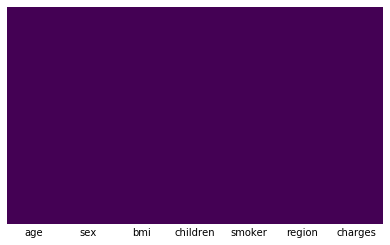

In [4]:
#checking the data is there any null data by using data visualization
sns.heatmap(health_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#it is plane color means there is no null values

In [5]:
#lets encode the sex,religion,smoking
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#sex
le.fit(health_data['sex'].drop_duplicates())
health_data['sex']=le.transform(health_data['sex'])
#smoking
le.fit(health_data['smoker'].drop_duplicates())
health_data['smoker']=le.transform(health_data['smoker'])
#religion
le.fit(health_data['region'].drop_duplicates())
health_data['region']=le.transform(health_data['region'])
health_data['smoker']

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      1
       ..
1308    1
1309    0
1310    0
1311    0
1312    0
1313    1
1314    1
1315    0
1316    0
1317    0
1318    0
1319    0
1320    0
1321    1
1322    0
1323    1
1324    0
1325    0
1326    0
1327    0
1328    0
1329    0
1330    0
1331    0
1332    0
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [6]:
#correlation between variables
health_data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

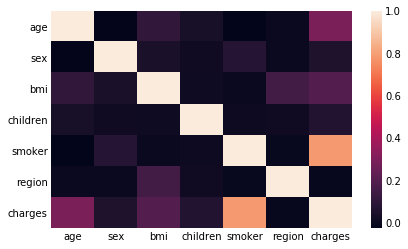

In [7]:
#heatmap for correlation
sns.heatmap(health_data.corr())

Text(0.5, 1.0, 'distribution of charges for somkers')

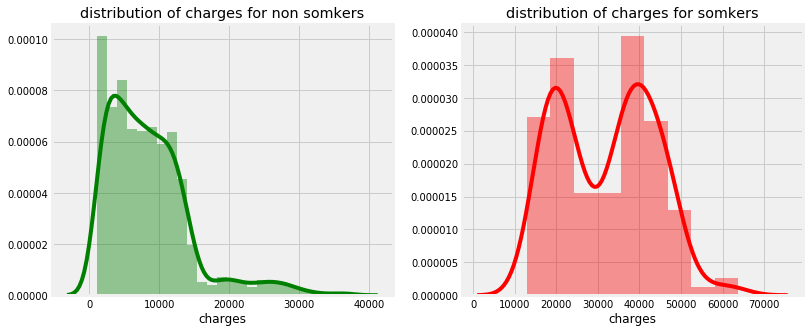

In [8]:
fig=plt.figure(figsize=(12,5))
axis=fig.add_subplot(121)
sns.distplot(health_data[(health_data.smoker==0)]["charges"],color='g',ax=axis)
axis.set_title("distribution of charges for non somkers")

axis=fig.add_subplot(122)
sns.distplot(health_data[(health_data.smoker==1)]["charges"],color='r',ax=axis)
axis.set_title("distribution of charges for somkers")

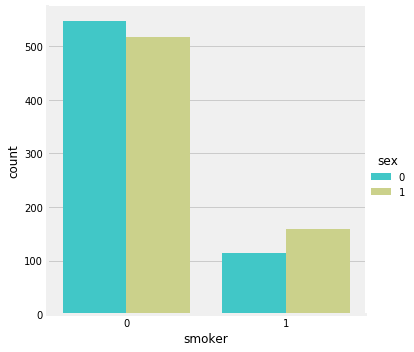

In [9]:
#catplots
#0-->men
#1--->women
sns.catplot(x="smoker",kind="count",hue="sex",palette="rainbow",data=health_data)

<Figure size 1080x432 with 0 Axes>

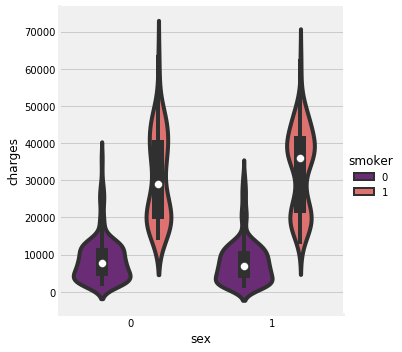

In [10]:
plt.figure(figsize=(15,6))
sns.catplot(x="sex",y="charges",hue="smoker",kind="violin",palette="magma",data=health_data)

Text(0.5, 1.0, 'mean charges for men')

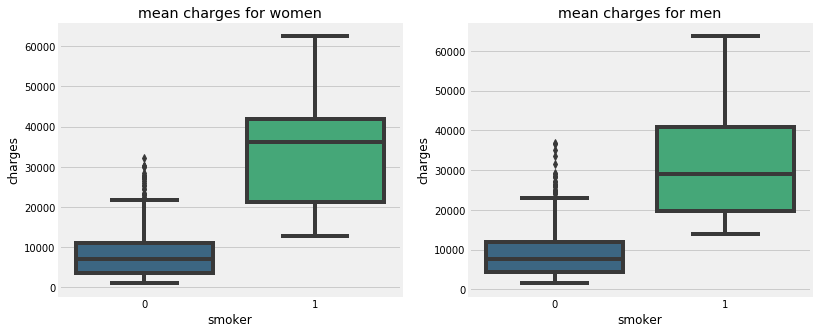

In [11]:
fig=plt.figure(figsize=(12,5))
axis=fig.add_subplot(121)
sns.boxplot(y="charges",x="smoker",palette="viridis",data=health_data[(health_data.sex==1)])
axis.set_title("mean charges for women")

axis=fig.add_subplot(122)
sns.boxplot(y="charges",x="smoker",palette="viridis",data=health_data[(health_data.sex==0)])
axis.set_title("mean charges for men")

Text(0.5, 1.0, 'age of the people')

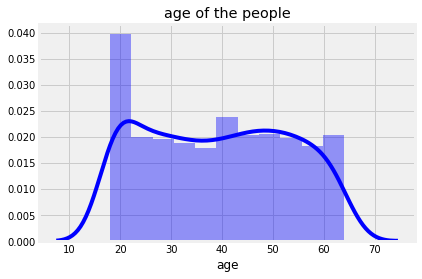

In [12]:
#lets see age
sns.distplot(health_data["age"],color='b')
plt.title("age of the people")

Text(0.5, 1.0, 'smokers vs non smoker charges for age 18')

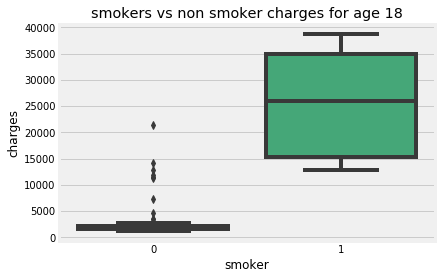

In [13]:
sns.boxplot(x='smoker',y='charges',palette='viridis',data=health_data[(health_data['age']==18)])
plt.title("smokers vs non smoker charges for age 18")

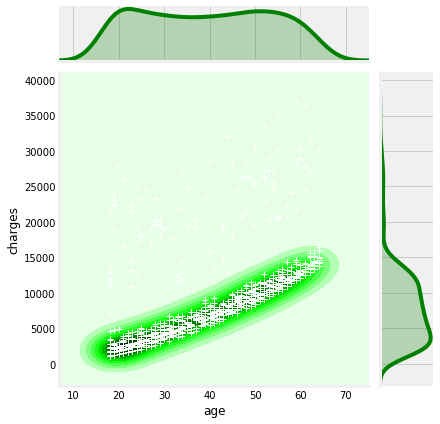

In [14]:
jn=sns.jointplot(x='age',y='charges',kind='kde',data=health_data[(health_data["smoker"]==0)],color='g')
jn.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker="+")
#charges vs age --> non smokers

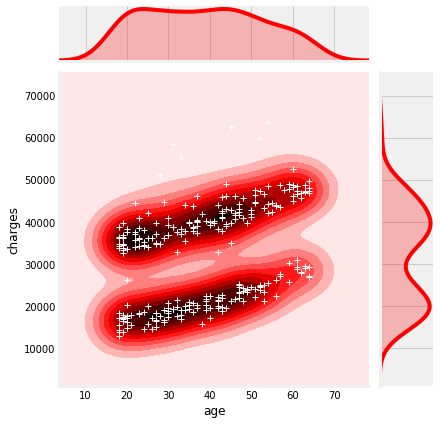

In [15]:
jn=sns.jointplot(x='age',y='charges',kind='kde',data=health_data[(health_data["smoker"]==1)],color='r')
jn.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker="+")
#charges vs age -->smokers

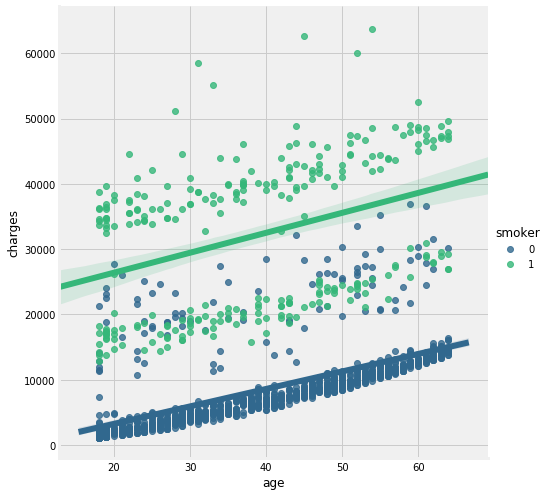

In [16]:
#charges vs age and dividing them with line
sns.lmplot(x='age',y='charges',hue='smoker',palette='viridis',height=7,data=health_data)

Text(0.5, 1.0, 'body mass index')

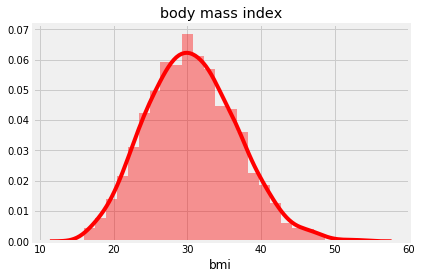

In [17]:
sns.distplot(health_data['bmi'],color='r')
plt.title("body mass index")

Text(0.5, 1.0, 'bmi<=30 vs charge')

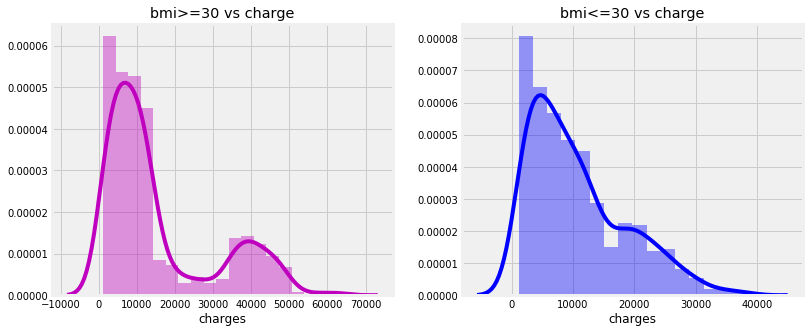

In [18]:
#lets analyse the bmi vs charges
fig=plt.figure(figsize=(12,5))

axis=fig.add_subplot(121)
sns.distplot(health_data[(health_data.bmi>=30)]['charges'],color='m')
plt.title("bmi>=30 vs charge")

axis=fig.add_subplot(122)
sns.distplot(health_data[(health_data.bmi<30)]['charges'],color='b')
plt.title("bmi<=30 vs charge")


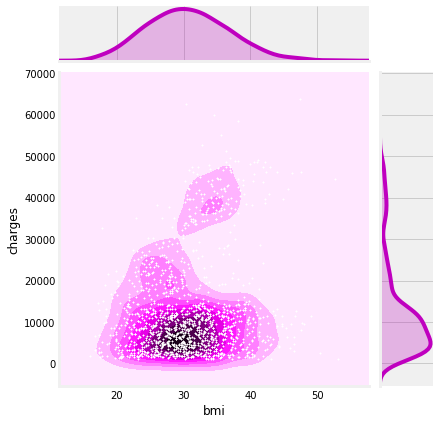

In [19]:
jn=sns.jointplot(y='charges',x='bmi',kind='kde',data=health_data,color='m')
jn.plot_joint(plt.scatter,c='w',s=5,linewidth=1,marker="+")
#charges vs age -->smokers

Text(0.5, 1.0, 'Scatter plot of charges vs bmi')

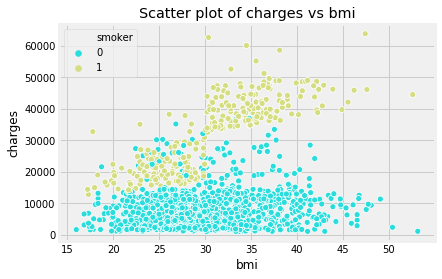

In [20]:
sns.scatterplot(x='bmi',y='charges',palette='rainbow',hue='smoker',data=health_data)
plt.title("Scatter plot of charges vs bmi")

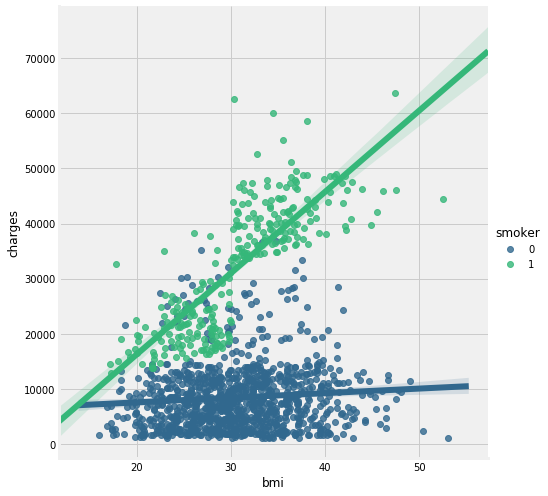

In [21]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=health_data,height=7,palette='viridis')

Text(0.5, 1, 'no of chlidrens')

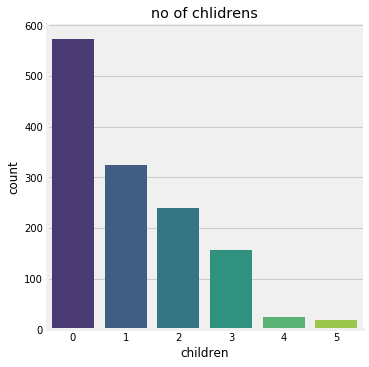

In [22]:
#no of childrens
sns.catplot(x='children',kind='count',palette='viridis',data=health_data)
plt.title("no of chlidrens")

Text(0.5, 1, 'no of childrens')

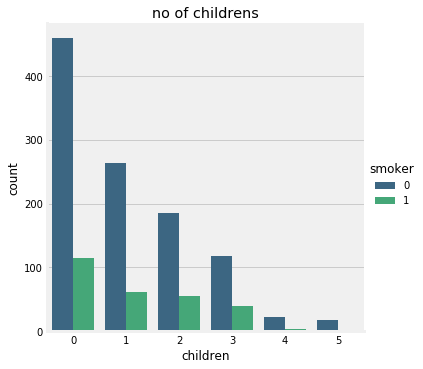

In [23]:
#no of childrens for smokers
sns.catplot(x='children',kind='count',hue='smoker',palette='viridis',data=health_data[(health_data['children']>=0)])
plt.title("no of childrens")

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x=np.array(health_data['charges'])
y=np.array(health_data['smoker'])
x=x.reshape(-1,1)
y=y.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

#we musk keep n_neighbors as odd number because if keep even may it occurs tie for some predictions
#trail purpose iam keeping n_neighbours as 3  ,k=n_neighbours

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)
y_pred=knn.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print(cr)

[[260   8]
 [ 10  57]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       268
           1       0.88      0.85      0.86        67

    accuracy                           0.95       335
   macro avg       0.92      0.91      0.92       335
weighted avg       0.95      0.95      0.95       335



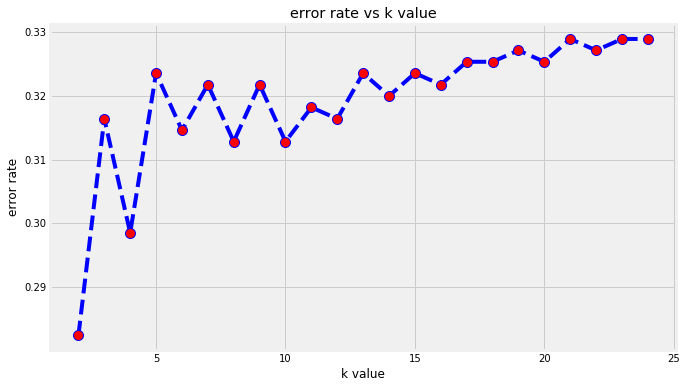

In [26]:
error_rate=[]
for i in range(2,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),error_rate,
         marker='o',markerfacecolor='red',
         color='blue',markersize=10,Linestyle='dashed')
plt.title('error rate vs k value')
plt.xlabel("k value")
plt.ylabel("error rate")
plt.show()
#k=4 or 3 i prefer odd one is the best value